In [238]:
cd D:\MachineHack\Participants_Data_Used_Cars

D:\MachineHack\Participants_Data_Used_Cars


## Importing basic libraries

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
import warnings
warnings.filterwarnings('ignore')

## Loading and Exploring data

In [241]:
data=pd.read_excel("Data_Train.xlsx")

In [242]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [244]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [245]:
data['Name'].nunique()

1876

In [246]:
data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [247]:
data['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [248]:
data['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [249]:
data['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [250]:
data['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [251]:
data['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [252]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Clearly, following features are Categorical: (6/13)
### 'Location',  'Year' ,  'Fuel_Type' , 'Transmission' ,  'Owner_Type' ,  'Seats'
       

## Check for null/nan values

In [253]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [254]:
data.drop(['New_Price'],axis=1,inplace=True)

## Managing data types

In [255]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [256]:
data['Engine']=data['Engine'].str.split(" ",n=1,expand=True)[0]

In [257]:
data['Engine']=data['Engine'].astype(str).astype(float)

In [258]:
data['Mileage']=data['Mileage'].str.split(" ",n=1,expand=True)[0]

In [259]:
data['Mileage']=data['Mileage'].astype(float)

In [260]:
data['Power']=data['Power'].str.split(" ",n=1,expand=True)[0]

In [261]:
data['Power']=data['Power'].replace('null',-1000)

In [262]:
data['Power']=data['Power'].astype('str').astype('float')

In [263]:
data['Power']=data['Power'].replace(-1000,np.nan)

In [264]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [265]:
data['Name']=data['Name'].str.split(" ",n=1,expand=True)[0]

In [266]:
data['Name']=data['Name'].replace('ISUZU','Isuzu')

In [267]:
data['Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Bentley             1
Smart               1
Ambassador          1
Lamborghini         1
Name: Name, dtype: int64

## Managing null values

In [268]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [269]:
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)

In [270]:
data['Engine'].fillna(data['Engine'].mean(), inplace=True)

In [271]:
data['Power'].fillna(data['Power'].mean(), inplace=True)

In [272]:
data['Seats'].fillna(data['Seats'].mode
                     (), inplace=True)

In [273]:
Y=data['Price']

## Encoding Categorical features

### Label encoding for Year and One hot encoding for rest

In [274]:
data.loc[data['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,113.25305,0.0,18.0


In [275]:
data.drop(data.index[3999],inplace=True)

In [276]:
Y.drop(Y.index[3999],inplace=True)

In [277]:
# One hot encoding

In [278]:
categorical=['Location', 'Fuel_Type' , 'Transmission' ,  'Owner_Type' ,  'Seats','Year','Name']
for var in categorical:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical]    

In [279]:
data=data[to_keep]

In [280]:
# Label Encoding

In [281]:
#from sklearn import preprocessing
#l=preprocessing.LabelEncoder()
#data['Year']=l.fit_transform(data['Year'])

In [282]:
#data['Name']=l.fit_transform(data['Name'])

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 87 columns):
Kilometers_Driven            6018 non-null int64
Mileage                      6018 non-null float64
Engine                       6018 non-null float64
Power                        6018 non-null float64
Price                        6018 non-null float64
Location_Ahmedabad           6018 non-null uint8
Location_Bangalore           6018 non-null uint8
Location_Chennai             6018 non-null uint8
Location_Coimbatore          6018 non-null uint8
Location_Delhi               6018 non-null uint8
Location_Hyderabad           6018 non-null uint8
Location_Jaipur              6018 non-null uint8
Location_Kochi               6018 non-null uint8
Location_Kolkata             6018 non-null uint8
Location_Mumbai              6018 non-null uint8
Location_Pune                6018 non-null uint8
Fuel_Type_CNG                6018 non-null uint8
Fuel_Type_Diesel             6018 non-null uint8
Fue

In [284]:
data.drop('Price',inplace=True,axis=1)

In [285]:
data.head()

,Kilometers_Driven,Mileage,Engine,Power,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo
0,72000,26.60,998.0,58.16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
Y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

### Visualising numeric features

In [287]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Mileage')]

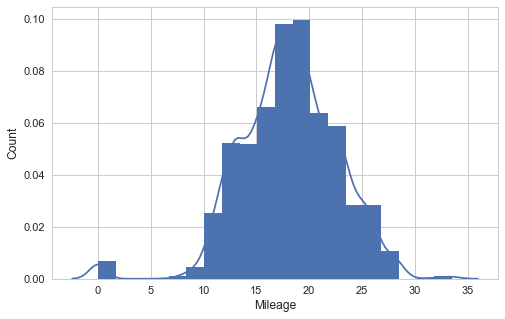

In [288]:
sns.distplot(data['Mileage'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Mileage', ylabel='Count')

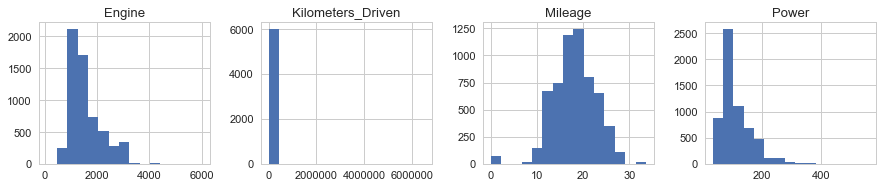

In [289]:
numerical=['Kilometers_Driven','Mileage','Engine','Power']
data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

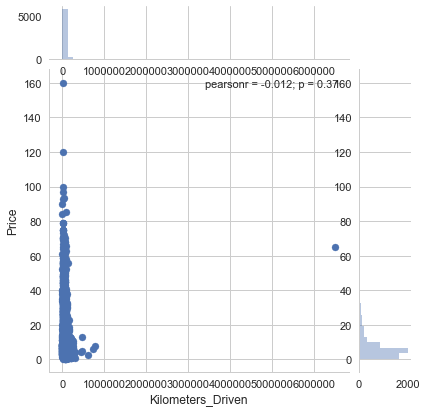

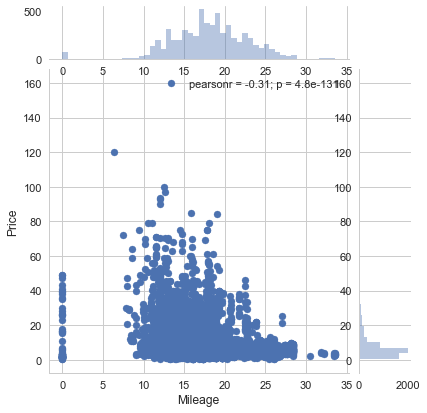

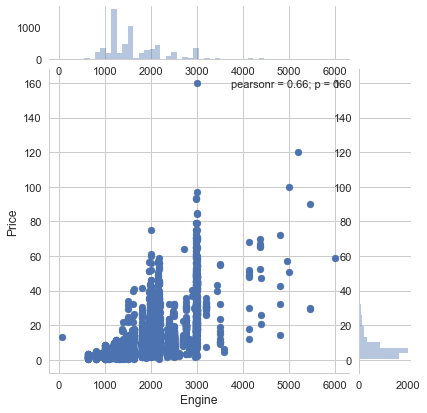

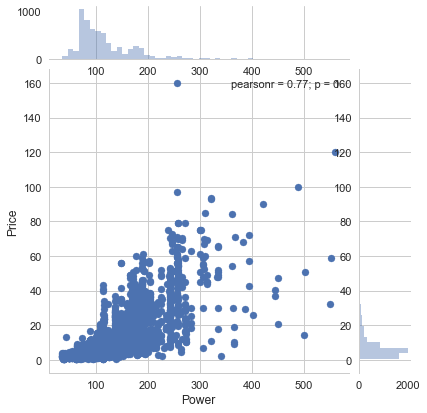

In [290]:
for i in numerical:
    sns.jointplot(x=data[i], y=Y);
  

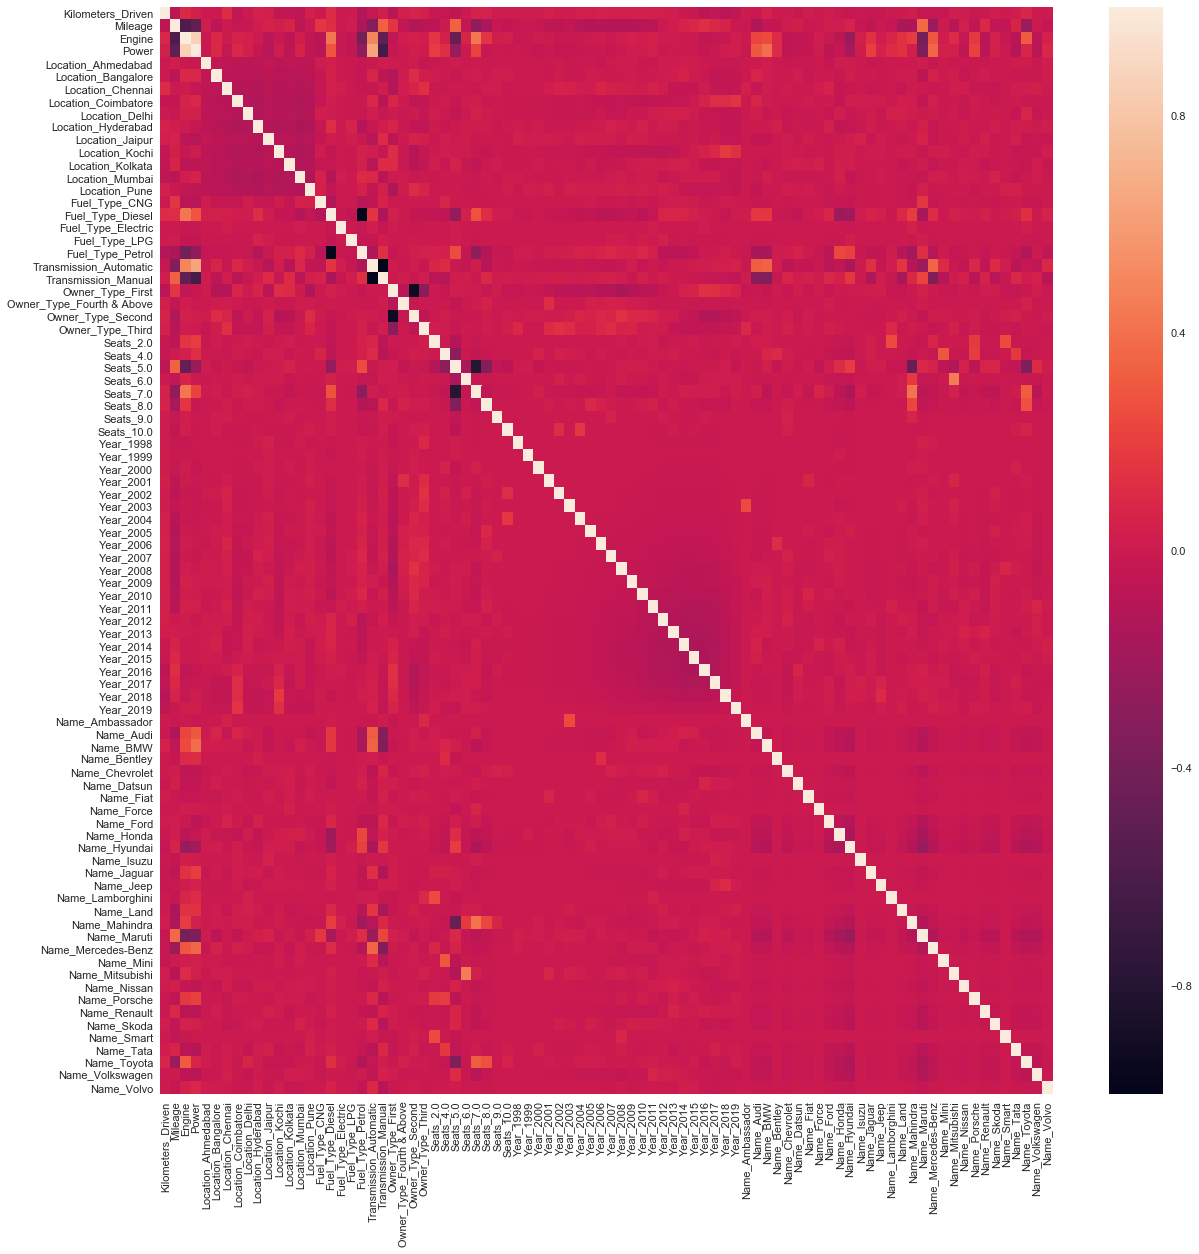

In [291]:
# calculate the correlation matrix
corr = data.corr()
plt.figure(figsize=(20,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Train-Test split

In [296]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler()
#data[numerical]=pd.DataFrame(X.fit_transform(data[numerical]))
data=pd.DataFrame(X.fit_transform(data),columns=data.columns)

In [297]:
data.fillna(data.mean(), inplace=True)

In [298]:
data.head()

,Kilometers_Driven,Mileage,Engine,Power,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo
0,0.145430,1.847795,-1.039727,-1.034980,-0.196623,-0.251497,-0.299045,-0.343761,-0.318419,-0.374727,...,-0.067132,-0.123909,-0.054772,-0.157128,-0.172041,-0.012892,-0.178586,-0.270742,-0.235019,-0.059176
1,-0.194241,0.334850,-0.065110,0.243222,-0.196623,-0.251497,-0.299045,-0.343761,-0.318419,-0.374727,...,-0.067132,-0.123909,-0.054772,-0.157128,-0.172041,-0.012892,-0.178586,-0.270742,-0.235019,-0.059176
2,-0.139455,0.013922,-0.704285,-0.461255,-0.196623,-0.251497,3.343978,-0.343761,-0.318419,-0.374727,...,-0.067132,-0.123909,-0.054772,-0.157128,-0.172041,-0.012892,-0.178586,-0.270742,-0.235019,-0.059176
3,0.309787,0.575000,-0.622511,-0.460127,-0.196623,-0.251497,3.343978,-0.343761,-0.318419,-0.374727,...,-0.067132,-0.123909,-0.054772,-0.157128,-0.172041,-0.012892,-0.178586,-0.270742,-0.235019,-0.059176
4,-0.197857,-0.641032,0.579072,0.517498,-0.196623,-0.251497,-0.299045,2.908997,-0.318419,-0.374727,...,-0.067132,-0.123909,-0.054772,-0.157128,-0.172041,-0.012892,-0.178586,-0.270742,-0.235019,-0.059176


In [299]:
Y=X.fit_transform(np.array(Y).reshape(-1,1))

In [300]:
# Using Sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.30, random_state = 42)

# Model

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

## Linear Regression

In [302]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x_train, y_train)
# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [303]:
rmse,r2

(2.844653081574939e+25, -2.634267476869151e+25)

### Using RFE

In [304]:
# Feature extraction
model = LinearRegression()
rfe = RFE(model, 25)
fit = rfe.fit(x_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

y_pred=rfe.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_pred)

print(rmse,r2)

Num Features: 25
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True]
Feature Ranking: [57 56 51 50 49 40 42 39 47 41 48 44 43 45 46 15 13 17 16 14 12 11  5  8
  6  7 52 54 59 58 53 55 60 61 34 38 10 28 33 30 36 27 32 35 37 26 31 29
 25 24 23 21 20 19 18 22  9  1  1  4  1  1  1  1  1  1  1  1  1  1  2  1
  1  1  1  1  1  1  3  1  1 62  1  1  1  1]
2.844653081574939e+25 0.5370306633417674


In [305]:
#no of features
nof_list=np.arange(1,35)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(x_train,y_train)
    X_test_rfe = rfe.transform(x_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 21
Score with 21 features: 0.553792


### Ridge

In [306]:
ridge = Ridge(alpha=3.0)
ridge.fit(x_train,y_train)

y_pred=ridge.predict(x_test)

# model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(rmse,r2)

0.261056427373176 0.7582508529032752


In [ ]:
np.append(np.ones(-1,1))

### Backward Elimination

In [309]:
cols = list(x_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x_train[cols]
    #print(X_1.shape[1])
    X_1 = sm.add_constant(X_1, has_constant='add')
    #print(X_1.shape[1])
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Hyderabad', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Fuel_Type_Electric', 'Fuel_Type_Petrol', 'Seats_2.0', 'Seats_4.0', 'Seats_7.0', 'Seats_8.0', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Name_Audi', 'Name_BMW', 'Name_Bentley', 'Name_Honda', 'Name_Jaguar', 'Name_Lamborghini', 'Name_Land', 'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Porsche', 'Name_Tata', 'Name_Volvo']


In [312]:
x_=x_train[selected_features_BE]
#x_ = x_train[['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Hyderabad', 'Location_Kolkata', 'Fuel_Type_Diesel', 'Transmission_Automatic', 'Transmission_Manual', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_8.0']]

In [314]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_,y_train)

y_pred=ridge.predict(x_test[x_.columns])

# model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(rmse,r2)

0.2627901724133603 0.7566453326371584


In [319]:
len(selected_features_BE)

49